In [1]:
import tensorflow as tf
import qresnet
import dataset
from tensorflow import keras
from keras import layers
from qkeras import *

In [2]:
x_train, y_train, x_test, y_test = dataset.load_cifar10()

(50000, 1)


In [3]:
x = x_in = layers.Input(x_train.shape[1:], name="input")
x = qresnet.resnet32(x, num_classes=10)
qmodel = keras.Model(inputs=[x_in], outputs=[x])
qmodel.summary()

c:\Users\georg\Desktop\mestrado_luiz\deep_nibble_dnn\.venv\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 34, 34, 3)    0           ['input[0][0]']                  
                                                                                                  
 qconv1 (Conv2D)                (None, 32, 32, 16)   432         ['conv1_pad[0][0]']              
                                                                                                  
 bn1 (BatchNormalization)       (None, 32, 32, 16)   64          ['qconv1[0][0]']                 
                                                                                              

In [4]:
class ResNetPaperLR(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_lr = 0.1, lr_decay=10, steps=[32000, 48000]):
        super(ResNetPaperLR, self).__init__()
        self.initial_lr = initial_lr
        self.learning_rate_decay = lr_decay
        self.steps = steps
        self.current_lr = 0
    def __call__(self, step):        
        step12 = tf.where(step < self.steps[1], self.initial_lr/self.learning_rate_decay, self.initial_lr/(self.learning_rate_decay**2))    
        step01 = tf.where(step < self.steps[0], self.initial_lr, step12)
        return step01
                         

    def get_config(self):
        return {
            "initial_lr": self.initial_lr,
            "learning_rate_decay": self.learning_rate_decay,
            "steps": self.steps
        }


NB_EPOCH = 164
BATCH_SIZE = 128
VERBOSE = 1

OPTIMIZER = keras.optimizers.Adam(learning_rate=0.001)

qmodel.compile(optimizer=OPTIMIZER, loss=keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.02), metrics=["accuracy"])


In [5]:
history = qmodel.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, initial_epoch=0, verbose=VERBOSE, validation_data=(x_test, y_test), validation_freq=2)


Epoch 1/164
391/391 [==============================] - 47s 98ms/step - loss: 2.2153 - accuracy: 0.1651
Epoch 2/164
391/391 [==============================] - 47s 119ms/step - loss: 2.0387 - accuracy: 0.2601 - val_loss: 2.3218 - val_accuracy: 0.1707
Epoch 3/164
391/391 [==============================] - 39s 100ms/step - loss: 1.8872 - accuracy: 0.3224
Epoch 4/164
391/391 [==============================] - 44s 113ms/step - loss: 1.7888 - accuracy: 0.3609 - val_loss: 1.7610 - val_accuracy: 0.3722
Epoch 5/164
391/391 [==============================] - 39s 100ms/step - loss: 1.7213 - accuracy: 0.3879
Epoch 6/164
391/391 [==============================] - 44s 113ms/step - loss: 1.6602 - accuracy: 0.4106 - val_loss: 1.7491 - val_accuracy: 0.3816
Epoch 7/164
391/391 [==============================] - 39s 100ms/step - loss: 1.6159 - accuracy: 0.4286
Epoch 8/164
391/391 [==============================] - 44s 113ms/step - loss: 1.5728 - accuracy: 0.4424 - val_loss: 1.6975 - val_accuracy: 0.4047
E

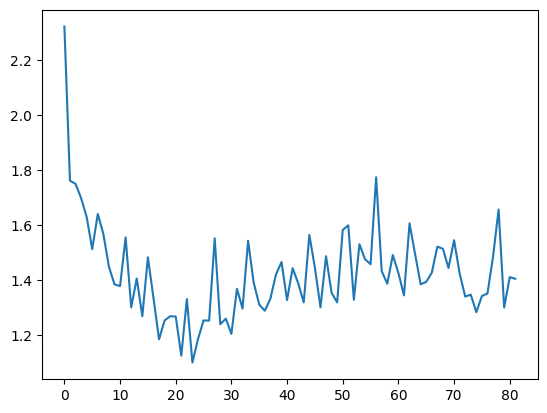

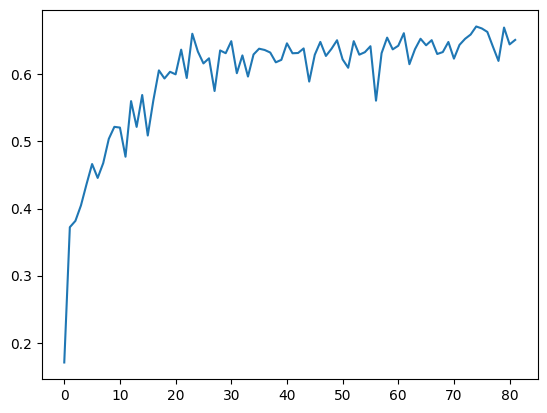

In [6]:
import matplotlib.pyplot as plt


#plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()    
#plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()    

In [8]:
OPTIMIZER = keras.optimizers.Adam(learning_rate=0.0001)
qmodel.compile(optimizer=OPTIMIZER, loss=keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.02), metrics=["accuracy"])
hist_finetun = qmodel.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=10, initial_epoch=0, verbose=VERBOSE, validation_data=(x_test, y_test), validation_freq=2)


Epoch 1/10
391/391 [==============================] - 44s 98ms/step - loss: 0.2338 - accuracy: 0.9759
Epoch 2/10
391/391 [==============================] - 45s 116ms/step - loss: 0.2186 - accuracy: 0.9828 - val_loss: 1.2115 - val_accuracy: 0.6939
Epoch 3/10
391/391 [==============================] - 38s 98ms/step - loss: 0.2124 - accuracy: 0.9846
Epoch 4/10
391/391 [==============================] - 43s 111ms/step - loss: 0.2091 - accuracy: 0.9857 - val_loss: 1.2942 - val_accuracy: 0.6839
Epoch 5/10
391/391 [==============================] - 38s 98ms/step - loss: 0.2102 - accuracy: 0.9849
Epoch 6/10
391/391 [==============================] - 43s 111ms/step - loss: 0.2059 - accuracy: 0.9871 - val_loss: 1.1909 - val_accuracy: 0.7013
Epoch 7/10
391/391 [==============================] - 38s 97ms/step - loss: 0.2064 - accuracy: 0.9859
Epoch 8/10
391/391 [==============================] - 43s 110ms/step - loss: 0.2040 - accuracy: 0.9872 - val_loss: 1.2387 - val_accuracy: 0.6899
Epoch 9/10
3

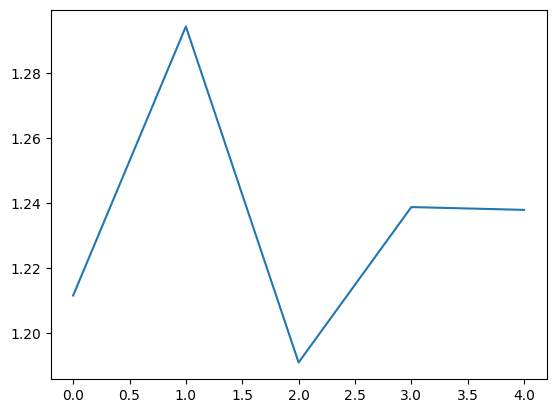

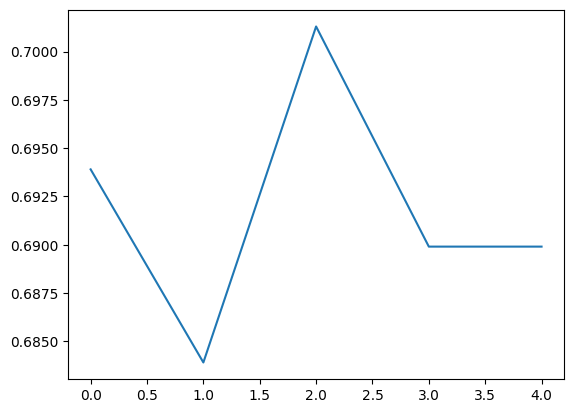

In [9]:
import matplotlib.pyplot as plt


#plt.plot(history.history["loss"])
plt.plot(hist_finetun.history["val_loss"])
plt.show()    
#plt.plot(history.history["accuracy"])
plt.plot(hist_finetun.history["val_accuracy"])
plt.show()    